# Exercise Sheet 3: Sampling, Simulation

In this exercise sheet, we will simulate a Markov chain. In the first part, we will consider a pure Python based implementation where a single particle jumps from one position to another of the lattice, where all transitions to neighboring states have the same probability. Then, we will add probability weightings for the transitions. Finally, the implementation will be parallelized to run many chains in parallel.

In [1]:
%matplotlib inline

## Exercise 1: Random moves in a lattice (20 P)

In this exercise, we will simulate the propagation of particles in a graph composed of 8 states (denoted by letters A-H) and stored in the variable `S` defined in the cell below. The lattice is the following:

![](lattice.png)

The particle starts in state `A` and then jumps randomly from its current state to one of its neighbors, all with same probability. Note that it cannot stay at the current position. The dictionary `T` defined in the cell below encode such transition behavior.

In [8]:
# List of states
S = 'ABCDEFGH'

# Set of transitions
T = {'A':'BE','B':'AFC','C':'BGD','D':'CH','E':'AF','F':'EBG','G':'FCH','H':'GD'}

In [9]:
import random
def fraction_of_time(S, T, iterations):
    states = S[0]
    # simulate the experiment and run it for 1999 iterations.
    for i in range(iterations):
        next_state = random.choice(T[states[i]]) #state[i] is the current state
        states += next_state
    
    # compute the fraction of the time of each state
    counter = {S[i]:0.0 for i in range(len(S))}
    for i in range(len(states)):
        counter[states[i]] = counter[states[i]] + 1
    fractions = list(map(lambda x: x[1] / len(states), counter.items()))
    '''
    # testing
    for i in counter.items():
        print(i)
    print(fractions)
    '''
    return states, fractions

Using pure Python, simulate the experiment below and run it for 1999 iterations. Print the sequence of first 400 states visited by the particle.  To obtain the same results as in `pdf` solution file, you should initialize the seed of the module `random` to value `123` using the function `random.seed` before starting the simulation.

In [12]:
### solutions.exercise1a()
#random.seed(123)
states, fractions = fraction_of_time(S, T, 2000)
# print the first 400 states of the simulation
print(states[0:100])
print(states[100:200])
print(states[200:300])
print(states[300:400])

AEFEFGFGCBFBCBCDCGHDHDHGCGCBABCGCDCDHDCBCDHGFBFGHDHGHDCGFBABCBCBCBFBAEFBFBCGCBFBFBCGFBCGHGCGFGFEAEFB
CGFBCDCDHGHGFBCDHGHDHGHDHDHGFBFEFBCBAEFGCDCGCDHDHGHGHGHDCGFGFEABABCGCBFGCDCDHGFBFBAEFBFBCDCGHGCDCDCG
CBABABCGFEAEFBFEABCGFGFEFEFBFBABFBCGCBABABFGCGFGHDHDHDHDCDCBABFBCBCGCDHGFEFGCBCBCDHGHGCDCDCBABCBFBFB
CDHDCGHDCDCDHGHDHDCDCBCGHGCBFGCBAEAEAEFBCDCGCBCGHDHDCDHDCGFGHDCBAEFEFBCDCBCBCGFBAEAEFBAEFBFGCDCBABAB


Using `matplotlib`, produce a bar plot (`matplotlib.pyplot.bar`) showing the fraction of the time the particle is found in a given state, averaged over the whole simulation.

<Container object of 8 artists>

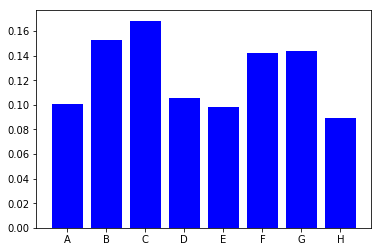

In [13]:
### solutions.exercise1b()
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 90

s_list = [S[i] for i in range(len(S))]
matplotlib.pyplot.bar(s_list, fractions, align='center', color='blue')

## Exercise 2: Adding a special state (20 P)

Suppose now that the rule is modified such that everytime the particle is in state `F`, it always moves to `E` in the next step.

* Modify the code to handle this special case, and create a bar plot for the new states distribution.

<Container object of 8 artists>

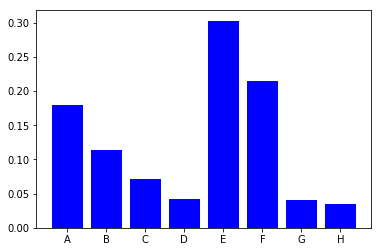

In [14]:
### solutions.exercise2()
T_modified = {'A':'BE','B':'AFC','C':'BGD','D':'CH','E':'AF','F':'E','G':'FCH','H':'GD'}
states2, fractions2 = fraction_of_time(S, T_modified, 2000)
matplotlib.pyplot.bar(s_list, fractions2, align='center', color='blue')

## Exercise 3: Exact solution to the previous exercise (20 P)

For simple Markov chains, a number of statistics can be obtained analytically from the structure of the transition model, in particular, by analysis of the transition matrix.

* Compute the transition matrices associated to the models of exercise 1 and 2 (make sure that each row in these matrices sums to 1).
* Give the transition matrices as argument to the function `utils.getstationary(P)` and print their result.

This last function computes in closed form the stationary distribution associated to a given transition matrix `P` (i.e. the one we would get if running the simulation with such transition matrix for infinitely many time steps and looking at state frequencies).

In [17]:
import numpy
def compute_trasition_matrix(states, transition):
    t = numpy.zeros([8,8])
    #mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7}
    mapping = {states[i]:i for i in range(len(states))}
    for i in states:
        val = 1.0 / len(transition[i])
        for j in transition[i]:
            t[mapping[i], mapping[j]] = val
    #print(t)
    return t

In [47]:
### solutions.exercise3()
#A0 B1 C2 D3 E4 F5 G6 H7
#T = {'A':'BE','B':'AFC','C':'BGD','D':'CH','E':'AF','F':'EBG','G':'FCH','H':'GD'}
#T_modified = {'A':'BE','B':'AFC','C':'BGD','D':'CH','E':'AF','F':'E','G':'FCH','H':'GD'}
import utils

t_matrix1 = compute_trasition_matrix(S, T)
result = utils.getstationary(t_matrix1)
print("Exercise 1 [", end=' ')
for i in result:
    print("{:4.2f}".format(i), end=' ')  #format specifier usage "{[tuple_index]:[width][.precision][type]}"
print("]")

t_matrix2 = compute_trasition_matrix(S, T_modified)
result = utils.getstationary(t_matrix2)
print("Exercise 2 [",end=' ')
for i in result:
    print("{:4.2f}".format(i), end=' ')
print("]")

Exercise 1 [ 0.10 0.15 0.15 0.10 0.10 0.15 0.15 0.10 ]
Exercise 2 [ 0.19 0.12 0.08 0.04 0.29 0.20 0.04 0.04 ]


## Exercise 4: Adding non-uniform transition probabilities (20 P)

We consider the original lattice defined by the variable `T`. We set transition probabilities for each state to be such that: (1) the probability of moving left is always twice the probability of moving right when both moves are available. (2) The probability of moving vertically is the same as the probability of moving horizontally.

* Build the transition matrix `P` implementing the described behavior, and compute its stationary distribution using the function `utils.getstationary(P)`.

(Hints: You can notice that for each state, the transitions towards other states are always listed from left to right in the dictionary `T`. Also note that characters A-H can be mapped to integer values using the Python function ord(), thus, giving a direct relation between state names and indices of the transition matrix.)

In [59]:
### solutions.exercise4()
### T = {'A':'BE','B':'AFC','C':'BGD','D':'CH','E':'AF','F':'EBG','G':'FCH','H':'GD'}
t = numpy.zeros([8,8])
#mapping = {states[i]:i for i in range(len(states))} #use ord() instead
for i in S:
    if i in "AEDH":
        val = 1.0 / len(T[i])
        for j in T[i]:
            t[ord(i)-ord('A'), ord(j)-ord('A')] = val
    else:
        val = [1/3, 1/2, 1/6]
        for j in zip(T[i], val):
            t[ord(i)-ord('A'), ord(j[0])-ord('A')] = j[1]
#print(t)
result = utils.getstationary(t)
print("[",end='')
for i in result:
    print("{:5.2f}".format(i), end=' ')
print("]")

[ 0.14  0.21  0.11  0.04  0.14  0.21  0.11  0.04 ]


## Exercise 5: Simulation for multiple particles (20 P)

We let 1000 particles evolve simultaneously in the system described in Exercise 4. The initial state of these particles is pseudo-random and given by the function `utils.getinitialstate()`.

* Using the function `utils.mcstep()` that was introduced during the lecture, simulate this system for 500 time steps.
* Estimate the stationary distribution by looking at the distribution of these particles in state space after 500 time steps.

For reproducibility, give seed values to the function utils.mcstep corresponding to the current time step of the simulation (i.e. from 0 to 499).

In [ ]:
### Replace by your own code
import solutions
solutions.exercise5()
###